In [1323]:


import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import time
import random

In [1224]:
# parameters for genetic algorithm

#population_size = 35
#mutation_probability = 0.2
#crossover_probability = 0.8
#generations = 10
#stagnation_limit=10
#e_threshold = 0.01
#elitism_size = 1

In [1225]:
# loading all the points from the data files into arrays

tset_file = open("data/training_set_v2", "r")
tlabel_file = open("data/training_labels_v2", "r")

tcom = []
tset = []       #x,y pairs
tz = []         #Z values that are going to be used to compute the objective function
tlabel = []     


for i in tset_file.readlines():
    x0,x1,x2 = i.split(sep=',')
    tset += [[float(x0),float(x1)]]
    tz += [float(x2)]
    tcom += [[float(x0),float(x1),float(x2)]]
tset_file.close()


for i in tlabel_file.readlines():
    di = i.split()
    tlabel += [float(di[0])]

tlabel_file.close()



In [1294]:

#ao ∈ [0, 2], a1 ∈ [−2, 0], and a2 ∈ [−1, 1].
def my_fun(x,y,a0,a1,a2):
    return (a0*np.cbrt(x-5)) + (a1*np.cbrt(y+5)) + a2

#computes the mean square error
def obj_function(pred, actVal):
    
    return np.square(np.subtract(pred, actVal)).mean() 

"""
-genrates population given a size
-chromosomes with 3 genes
-values for genes randomly sampled with the respective ranges
-ao ∈ [0, 2], a1 ∈ [−2, 0], and a2 ∈ [−1, 1]

"""
def gen_population(size):
    population = []
    for _ in range(size):
        population.append([random.uniform(0,2.001), random.uniform(-2,0.001), random.uniform(-1,1.001)])
    
    #print("Generated population of size ", size)
    return population


"""
-evaluates the fitness of a chromosome
-gets predicted values f(x,y) for all (x,y) pairs in the traing data
-fitness is the error value measured by obj_fun()

"""

def evaluate(chromosome):
    predictions = [] 
    for i in range(len(tset)) :
        predictions.append(my_fun(tset[i][0],tset[i][1],chromosome[0], chromosome[1], chromosome[2]))
    fitness = obj_function(predictions, tz)
    
    
    return fitness


pop = gen_population(5)
obj_function([3,5,7],[1,3,5])


4.0

In [1227]:
#for i in range(len(tcom)):
#    print(f"{tcom[i][0],tcom[i][1],tcom[i][2]}")

In [1228]:
def roulette_wheel_selection(population):
    
    fitness_values = [1/evaluate(chromosome) for chromosome in population]
    total_fitness = sum(fitness_values)
    
    # Calculate selection probabilities
    selection_probs = [fitness / total_fitness for fitness in fitness_values]
    
    # Perform roulette wheel spin
    cumulative_probability = [i for i in selection_probs]
    for i in range(1,len(population)):
        cumulative_probability[i] = cumulative_probability[i-1] + selection_probs[i]
    
    selected_index = -1
    spin = random.uniform(0, 1)
    

    for i, prob in enumerate(selection_probs):
        if spin <= cumulative_probability[i]:
            selected_index = i
            break

    return population[selected_index]

def select_parents(population,numPairs):
    parents = []
    #generate parent pairs array the half the size of the population
    for _ in range(numPairs):
        parents.append([roulette_wheel_selection(population),roulette_wheel_selection(population)])
    return parents


In [1229]:

# Function to perform uniform crossover between two parents
def crossover(parent1, parent2, crossover_probability):
    
    # Create an empty child chromosome
    child1 = [0]*3
    child2 = [0]*3
    crossover = False
    # Uniformly select genes from parents to create the child chromosome
    for i in range(len(parent1)):
        if random.uniform(0,1) <= crossover_probability:
            
            r = random.uniform(0,1)
            
            child1[i] = (parent1[i] * r) + (parent2[i]*(1-r))
            child2[i] = (parent1[i] * (1-r)) + (parent2[i] * r)
            crossover = True
    if crossover:
        #print(f"Crossover beetween {parent1} and {parent2} Resulted in {child1} and {child2}")
        return child1, child2
    else:
        #print(f"No Crossover between {parent1} and {parent2}")
        return parent1, parent2
#parent_pairs = select_parents(pop)
#for p in parent_pairs:
#    print(f"parents fitness: {evaluate(p[0])} and {evaluate(p[1])}")
#    c1, c2 = crossover(p[0],p[1],0.8)
#    print(f"child fitness: {evaluate(c1)} and {evaluate(c2)}")


In [1230]:
def mutate(chromosome,mutation_probability):
    mutated = False
    for i in range(len(chromosome)):
        if random.uniform(0,1) <= mutation_probability:
            #print(f"Performing mutation on chromosome {chromosome} at index {i}")
            mutated = True
            
            if i == 0:
                chromosome[i] = random.uniform(0, 2.0001)
            if i == 1:
                chromosome[i] = random.uniform(-2, 0.001)
            if i == 2:
                chromosome[i] = random.uniform(-1, 1.001)
            
            
    #if mutated:
        #print(f"Resulting chromosome: {chromosome}\n")
    #else:
        #print(f"No mutation for {chromosome}\n")
    
    return chromosome
   

In [1231]:
def get_best(population,elitism_size):
    fitness_values = []
    elites = []
    for chromosome in population:
        fitness_values.append(evaluate(chromosome))
    average_fitness = sum(fitness_values) / len(population)   
    elite_indices = sorted(range(len(fitness_values)), key=lambda i: fitness_values[i])[:elitism_size]
    elites = [population[i] for i in elite_indices]
    
    return elites[0], elites, average_fitness
def v_get_best(population):
    fitness_values = []
    for chromosome in population:
        fitness_values.append(evaluate(chromosome))

    max_value = max(fitness_values)
    max_index = fitness_values.index(max_value)
    return population[max_index]

def get_best2(population):
    fitness_values = []
   
    for chromosome in population:
        fitness_values.append(evaluate(chromosome))
    average_fitness = sum(fitness_values) / len(population)   
    max_value = max(fitness_values)
    max_index = fitness_values.index(max_value)
    
    return population[max_index], average_fitness

In [1232]:
"""
Most rudimanary version of genetic algorithm

-pop size: population size
-mprob : mutation probablity
-cprob: crossover probablity
-gen: number of generations

Termination stategy: Run till a certain number of generations, or when fitness < 1

"""
def vanila_genetic_algorithm(pop_size, mprob, cprob, gen):
    # Initialization
    pop = gen_population(pop_size)
     
    for generation in range(gen):
        
        parent_pairs = select_parents(pop)
        # Mutation and selection
        new_population = []
        for i in parent_pairs:
            child1, child2 = crossover(np.array(i[0]),np.array(i[1]),cprob)
            child1 = mutate(child1,mprob)
            child2 = mutate(child2,mprob)
            new_population.append(child1)
            new_population.append(child2)

        # Update population for the next generation
        pop = new_population
        
        
        best_candidate = v_get_best(pop)
        best_fitness = evaluate(best_candidate)
        if best_fitness < 1:
            print(f"Terminating at Generation {generation + 1}: Best Fitness = best_fitness, Best Candidate = {best_candidate} ")
            return best_fitness
        print(f"{len(pop)} Generation {generation + 1}: Best Fitness = {evaluate(best_candidate)}, Best Candidate = {best_candidate}")

    return best_fitness


In [1391]:
experiments = []
def experimentOnVanilla(pop_size, mrate, crate, gen):
    population_size = pop_size
    mutation_probability = mrate
    crossover_probability = crate
    generations = gen
    fitness_sum = 0
    for i in range(3):
        fitness_sum += vanila_genetic_algorithm(pop_size, mrate, crate, gen)
    avg_fitness = fitness_sum/3
    experiments.append([avg_fitness, [pop_size, mrate, crate, gen]])

def runExperimentOnVanilla():
   
    experimentOnVanilla(10,0.02,0.5,10)
    experimentOnVanilla(10,0.02,0.5,10)
    
runExperimentOnVanilla()
experiments
    

TypeError: select_parents() missing 1 required positional argument: 'numPairs'

In [ ]:
experiments = []
def experimentOnVanilla(pop_size, mrate, crate, gen):
    population_size = pop_size
    mutation_probability = mrate
    crossover_probability = crate
    generations = gen
    fitness_sum = 0
    for i in range(1):
        fitness_sum += vanila_genetic_algorithm(pop_size, mrate, crate, gen)
    avg_fitness = fitness_sum/1
    experiments.append([avg_fitness, [pop_size, mrate, crate, gen]])

def runExperimentOnVanilla():
    experimentOnVanilla(12,0.65,0.75,12)
    experimentOnVanilla(15,0.65,0.75,12)
    experimentOnVanilla(12,0.75,0.75,12)
    
   
    

runExperimentOnVanilla()
experiments
    

In [1388]:
"""

-pop_size: population size
-mprob : mutation probablity
-cprob: crossover probablity
-e_threshold: epsilon value
-stagnation_limit: maximum number of generations with no significant fitness change

Termination stategy: Run till there stagantion limit is reached

"""
def genetic_algorithm2(pop_size, mrate, crate, e_threshold,stagnation_limit):
    # Initialization
    
    pop = gen_population(pop_size)
    best_fitness = float('inf') 
    stagnation_count = 0
    generation = 0
    numPairs = pop_size //2
    fitnesses = []
    while(True):
        generation +=1
        parent_pairs = select_parents(pop,numPairs)
        current_best_chrom = v_get_best(pop)
        current_best_fitness = evaluate(current_best_chrom)

        diversity_check = abs((current_best_fitness-best_fitness)/current_best_fitness)
        # Check for stagnation in the best fitness
        
        if diversity_check < e_threshold:
            stagnation_count += 1
        else:
            stagnation_count = 0
        

        if stagnation_count >= stagnation_limit:
            print(f"Terminating due to no change in best fitness for {stagnation_limit} generations.")
            break
        new_population = []
        for i in parent_pairs:
            child1, child2 = crossover(np.array(i[0]),np.array(i[1]),crate)
            child1 = mutate(child1, mrate)
            child2 = mutate(child2, mrate)
            new_population.append(child1)
            new_population.append(child2)

        # Update population for the next generation
        pop = new_population
        best_fitness = current_best_fitness
        fitnesses.append(best_fitness)
               
        
    print(f"Generation {generation}: Best Fitness = {best_fitness}, Best Candidate = {current_best_chrom}")
    
    x = np.arange(generation-1)
    y = fitnesses
    fig, ax = plt.subplots()
    ax.plot(x,y)
    plt.show
    return best_fitness
   



Terminating due to no change in best fitness for 6 generations.
Generation 15: Best Fitness = 4.221379850665439, Best Candidate = [0.0021522289769121137, 0, 0.05226954918615258]
Terminating due to no change in best fitness for 7 generations.
Generation 77: Best Fitness = 4.248251411565319, Best Candidate = [0.0, -0.023334874805333288, -6.694905174632756e-08]
Terminating due to no change in best fitness for 15 generations.
Generation 219: Best Fitness = 4.271919468468401, Best Candidate = [0, 0, 0.0]
Terminating due to no change in best fitness for 3 generations.
Generation 25: Best Fitness = 4.244709339549143, Best Candidate = [0.0, 0, 0]


[[4.221379850665439, [10, 0.02, 0.8, 0.01, 6]],
 [4.248251411565319, [10, 0.02, 0.8, 0.01, 7]],
 [4.271919468468401, [10, 0.02, 0.8, 0.01, 15]],
 [4.244709339549143, [10, 0.02, 0.8, 0.01, 3]]]

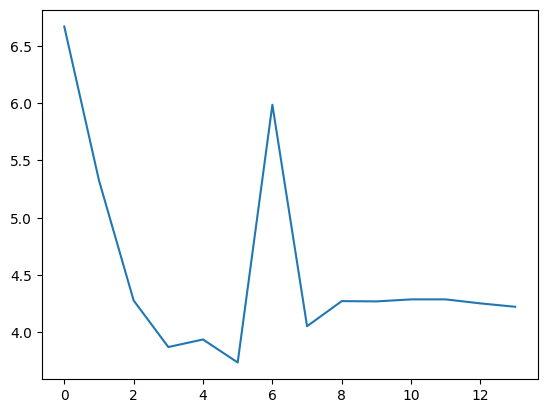

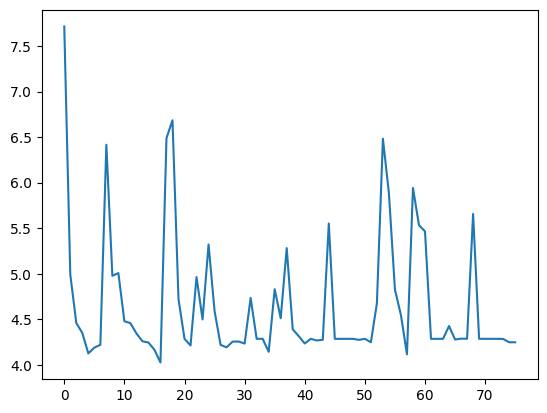

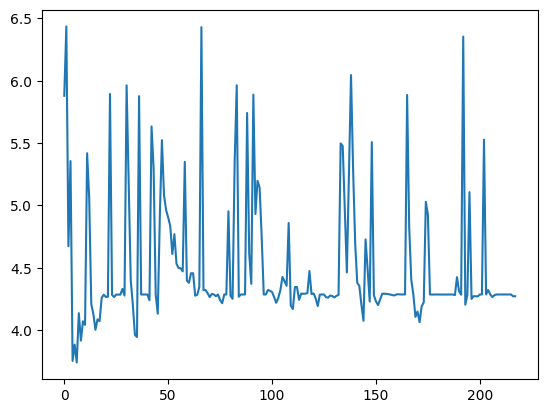

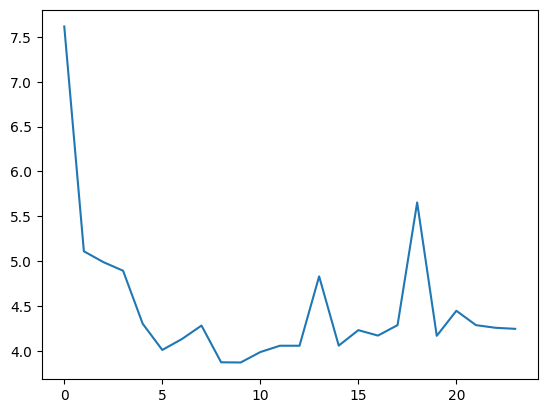

In [1392]:
experimentsOnGA2 = []
def experimentOnGA2(pop_size, mrate, crate, e_threshold,stagnation_limit):
    population_size = pop_size
    mutation_probability = mrate
    crossover_probability = crate
    
    fitness_sum = 0
    for i in range(1):
        fitness_sum += genetic_algorithm2(pop_size, mrate, crate, e_threshold,stagnation_limit)
    avg_fitness = fitness_sum/1
    experimentsOnGA2.append([avg_fitness, [pop_size, mrate, crate, e_threshold,stagnation_limit]])

def runExperimentOnGA2():
    experimentOnGA2(10, 0.02, 0.8,0.01,6)
    experimentOnGA2(10, 0.02, 0.8,0.01,7)
    experimentOnGA2(10, 0.02, 0.8,0.01,15)
    experimentOnGA2(10, 0.02, 0.8,0.01,3)

runExperimentOnGA2()
experimentsOnGA2

In [1383]:
"""
-pop_size: population size
-cprob: crossover probablity
-e_threshold: epsilon value
-stagnation_limit: maximum number of generations with no significant fitness change

Termination stategy: Run till there stagantion limit is reached
Muation: Non unifiorm muation
"""
def genetic_algorithm3(pop_size, crate, e_threshold,stagnation_limit):
    # Initialization
    mutation_prob = 0.02
    pop = gen_population(pop_size)
    best_fitness = float('inf') 
    stagnation_count = 0
    generation = 0
    numPairs = pop_size //2
    fitnesses = []
    while(True):
        generation +=1
        parent_pairs = select_parents(pop, numPairs)
        current_best_chrom, average_fitness = get_best2(pop)
        current_best_fitness = evaluate(current_best_chrom)

        diversity_check = abs((current_best_fitness-best_fitness)/current_best_fitness)
        # Check for stagnation in the best fitness
        
        if diversity_check < e_threshold:
            stagnation_count += 1
        else:
            stagnation_count = 0
        
        

        if stagnation_count >= stagnation_limit:
            print(f"Terminating due to no change in best fitness for {stagnation_limit} generations.")
            break
        if average_fitness > 1:  
            mutation_prob *= 1.4  # Increase mutation rate if average fitness is below a threshold
        else:
            mutation_prob *= 0.6  # Decrease mutation rate otherwise
        
        new_population = []
        for i in parent_pairs:
            child1, child2 = crossover(np.array(i[0]),np.array(i[1]),crate)
            child1 = mutate(child1, mutation_prob)
            child2 = mutate(child2, mutation_prob)
            new_population.append(child1)
            new_population.append(child2)

        # Update population for the next generation
        pop = new_population
        
        best_fitness = current_best_fitness
        fitnesses.append(best_fitness)

    
    print(f"Generation {generation}: Best Fitness = {best_fitness}, Best Candidate = {current_best_chrom}")
     
    x = np.arange(generation-1)
    y = fitnesses
    fig, ax = plt.subplots()
    ax.plot(x,y)
    plt.show
    return best_fitness
   

Terminating due to no change in best fitness for 3 generations.
Generation 4: Best Fitness = 4.72066028452808, Best Candidate = [ 1.71789456 -0.65705986  0.67253885]
Terminating due to no change in best fitness for 3 generations.
Generation 4: Best Fitness = 7.233964405073373, Best Candidate = [ 0.2567142  -1.9919899  -0.62943757]
Terminating due to no change in best fitness for 3 generations.
Generation 82: Best Fitness = 6.2525391548622125, Best Candidate = [ 1.93089535 -0.3896329  -0.0604841 ]


[[6.069054614821222, [10, 0.02, 0.07, 3]]]

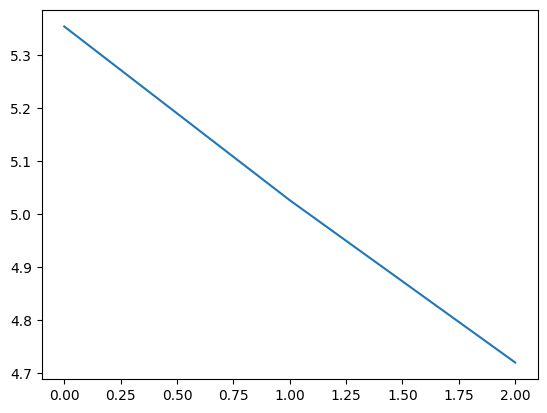

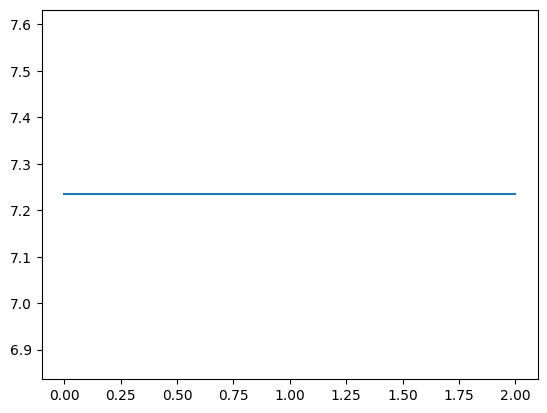

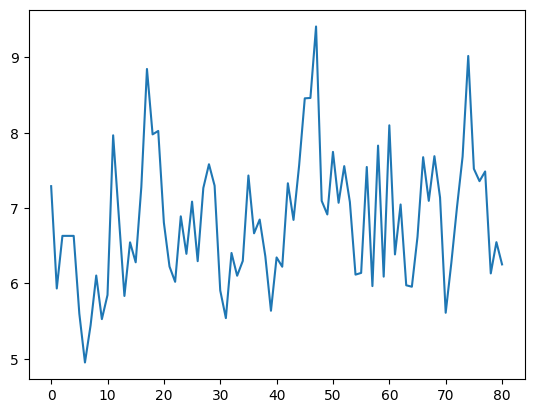

In [1387]:
experimentsOnGA3 = []
def experimentOnGA3(pop_size, crate, e_threshold,stagnation_limit):
    population_size = pop_size
    
    crossover_probability = crate
    
    fitness_sum = 0
    for i in range(3):
        fitness_sum += genetic_algorithm3(pop_size,  crate, e_threshold,stagnation_limit)
    avg_fitness = fitness_sum/3
    experimentsOnGA3.append([avg_fitness, [pop_size, crate, e_threshold,stagnation_limit]])

def runExperimentOnGA3():
    experimentOnGA3(10,0.02,0.07,3)
    

runExperimentOnGA3()
experimentsOnGA3

In [1366]:
"""
-pop_size: population size
-cprob: crossover probablity
-e_threshold: epsilon value

Termination stategy: Run till there diversity withing a population is low
Muation: Non unifiorm muation
"""
def genetic_algorithm4(pop_size, cprob, e_threshold):
    # Initialization
    mutation_prob = 0.02
    pop = gen_population(pop_size)
    stagnation_count = 0
    best_fitness = 100
    generation = 0
    fitnesses = []
    while(True):
        generation +=1
        parent_pairs = select_parents(pop,pop_size//2)
        best_candidate, average_fitness = get_best2(pop)
        best_fitness = evaluate(best_candidate)
        diversity_check = abs((average_fitness-best_fitness)/average_fitness)
        # Check for stagnation in the best fitness
        

        if diversity_check < e_threshold:
            print(f"Terminating due to low diversity.")
            break
        if average_fitness > 3:  # Adjust the threshold as needed
            mutation_prob *= 1.8  # Increase mutation rate if average fitness is below a threshold
        else:
            mutation_prob *= 0.2  # Decrease mutation rate otherwise
        new_population = []
        for i in parent_pairs:
            child1, child2 = crossover(np.array(i[0]),np.array(i[1]),cprob)
            child1 = mutate(child1,mutation_prob)
            child2 = mutate(child2,mutation_prob)
            new_population.append(child1)
            new_population.append(child2)
        pop = new_population
        
        fitnesses.append(best_fitness)
        
        
    print(f"Generation {generation}: Best Fitness = {best_fitness}, Best Candidate = {best_candidate}")
    print(fitnesses)
    x = np.arange(generation-1)
    y = fitnesses
    fig, ax = plt.subplots()
    ax.plot(x,y)
    plt.show
    return best_fitness
   

Terminating due to low diversity.
Generation 3: Best Fitness = 4.222016650689111, Best Candidate = [0, 0, 0.04840832374634726]
[6.060507379355846, 5.904345072903104]
Terminating due to low diversity.
Generation 3: Best Fitness = 4.508177971175835, Best Candidate = [1.0315498505737284, -0.026998152437968315, -0.1940014203856794]
[7.059696680445325, 6.215805039242745]


[[4.222016650689111, [10, 0.8, 0.18]], [4.508177971175835, [10, 0.8, 0.2]]]

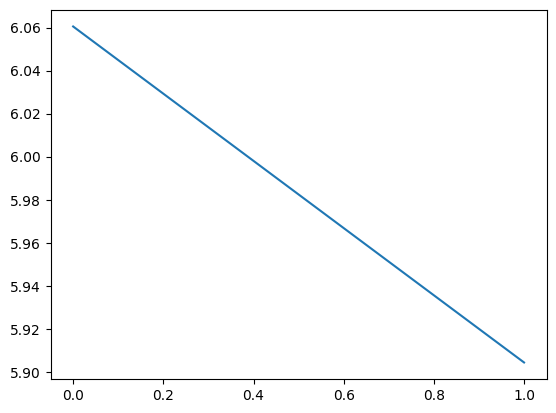

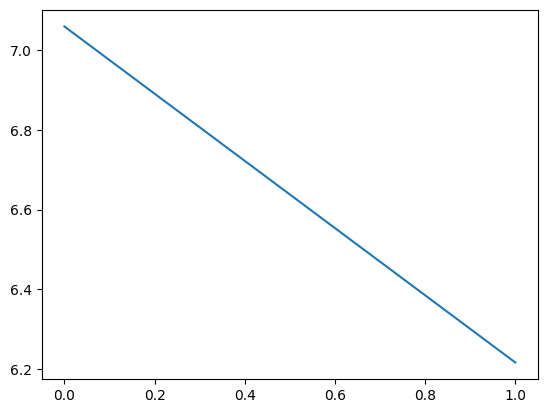

In [1373]:
experimentsOnGA4 = []
def experimentOnGA4(pop_size, crate, e_threshold):
    population_size = pop_size
    
    crossover_probability = crate
    
    fitness_sum = 0
    for i in range(1):
        fitness_sum += genetic_algorithm4(pop_size,  crate, e_threshold)
    avg_fitness = fitness_sum/1
    experimentsOnGA4.append([avg_fitness, [pop_size, crate, e_threshold]])

def runExperimentOnGA4():
    #experimentOnGA4(10,0.8,0.02)
    #experimentOnGA4(10,0.8,0.08)
    experimentOnGA4(10,0.8,0.18)
    experimentOnGA4(10,0.8,0.2)

runExperimentOnGA4()
experimentsOnGA4

In [1357]:
""" 
-pop_size: population size
-cprob: crossover probablity
-e_threshold: epsilon value
-elitism_size: number of best chromosomes to preserve to the next generation

Termination stategy: Run till there diversity withing a population is low
Muation: Non unifiorm muation 
New population: Crossover and Elitism      
"""
def genetic_algorithm5(pop_size, cprob, e_threshold, elitism_size):
    # Initialization
    mutation_prob = 0.02
    pop = gen_population(pop_size)
    best_fitness = float('inf') 
    stagnation_count = 0
    generation = 0
    fitnesses = []
    while(True):
        generation +=1
        parent_pairs = select_parents(pop,pop_size//2)
        current_best_chrom, elites, average_fitness = get_best(pop, elitism_size)
        current_best_fitness = evaluate(current_best_chrom)

        diversity_check = abs((average_fitness-current_best_fitness)/average_fitness)
        # Check for stagnation in the best fitness
        
        if diversity_check < e_threshold:
            stagnation_count += 1
        else:
            stagnation_count = 0
        
        best_fitness = current_best_fitness

        if diversity_check < e_threshold:
            print(f"Terminating due to low diversity.")
            break
        if average_fitness > 3:  
            mutation_prob *= 1.8 
        else:
            mutation_prob *= 0.2  
        new_population = []
        for i in parent_pairs:
            child1, child2 = crossover(np.array(i[0]),np.array(i[1]),cprob)
            child1 = mutate(child1,mutation_prob)
            child2 = mutate(child2,mutation_prob)
            new_population.append(child1)
            new_population.append(child2)

        # Update population for the next generation
        pop = elites + new_population
        
        best_fitness = current_best_fitness
        fitnesses.append(best_fitness)
    print(f"Generation {generation}: Best Fitness = {best_fitness}, Best Candidate = {current_best_chrom}")
    print(fitnesses)
    x = np.arange(generation-1)
    y = fitnesses
    fig, ax = plt.subplots()
    ax.plot(x,y)
    plt.show
    return best_fitness
   


Terminating due to low diversity.
Generation 4: Best Fitness = 3.0035222201546867, Best Candidate = [0.6889358591405305, -0.46515464485175095, 0.6025489988218704]
[3.0035222201546867, 3.0035222201546867, 3.0035222201546867]
Terminating due to low diversity.
Generation 4: Best Fitness = 2.9434035215162706, Best Candidate = [0.49896084681377, -0.5749239014819537, 0.8606185208932104]
[2.9743162436167805, 2.9743162436167805, 2.9743162436167805]


KeyboardInterrupt: 

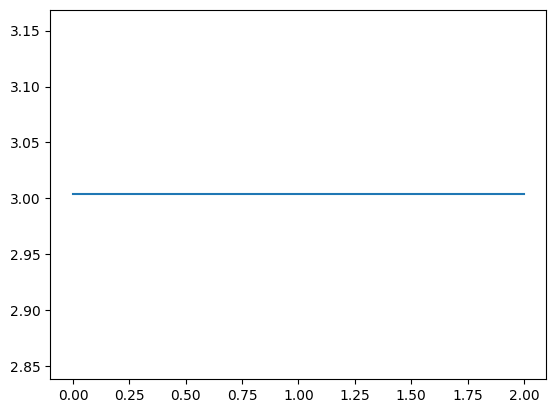

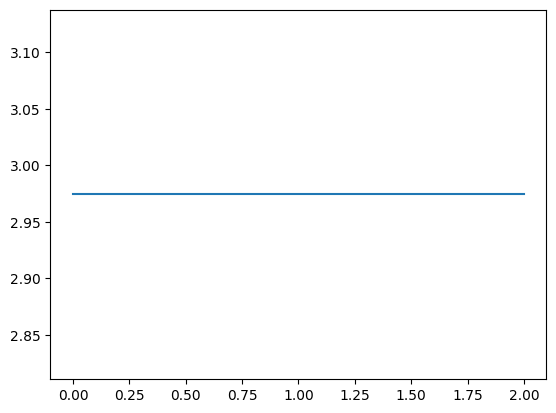

In [1364]:
experimentsOnGA5 = []
def experimentOnGA5(pop_size, crate, e_threshold,elitism_size):
    population_size = pop_size
    
    crossover_probability = crate
    
    fitness_sum = 0
    for i in range(3):
        fitness_sum += genetic_algorithm5(pop_size,  crate, e_threshold,elitism_size)
    avg_fitness = fitness_sum/3
    experimentsOnGA4.append([avg_fitness, [pop_size, crate, e_threshold,elitism_size]])

def runExperimentOnGA5():
    experimentOnGA5(10,0.8,0.125,3)
    
    

runExperimentOnGA5()
experimentsOnGA5

In [1351]:
""" 
-pop_size: population size
-cprob: crossover probablity
-e_threshold: epsilon value
-elitism_size: number of best chromosomes to preserve to the next generation

Termination stategy: Run till there stagantion limit is reached
Muation: Non unifiorm muation 
New population: Crossover and Elitism      

"""
def genetic_algorithm6(pop_size, crate, e_threshold,stagnation_limit, elitism_size):
    # Initialization
    mutation_prob = 0.02
    pop = gen_population(pop_size)
    best_fitness = float('inf') 
    stagnation_count = 0
    generation = 0
    fitnesses = []
    while(True):
        
        generation +=1
        parent_pairs = select_parents(pop, pop_size//2)
        current_best_chrom, elites, average_fitness = get_best(pop, elitism_size)
        current_best_fitness = evaluate(current_best_chrom)
        diversity_check = abs((best_fitness-current_best_fitness)/average_fitness)
        
        # Check for stagnation in the best fitness
        
        if diversity_check < e_threshold:
            stagnation_count += 1
        else:
            stagnation_count = 0
        
        

        if stagnation_count >= stagnation_limit:
            print(f"Terminating due to no change in best fitness for {stagnation_limit} generations.")
            break
        if average_fitness > 2:  # Adjust the threshold as needed
            mutation_prob *= 1.6  # Increase mutation rate if average fitness is below a threshold
        else:
            mutation_prob *= 0.4  # Decrease mutation rate otherwise
        new_population = []
        for i in parent_pairs:
            child1, child2 = crossover(np.array(i[0]),np.array(i[1]),crate)
            child1 = mutate(child1,mutation_prob)
            child2 = mutate(child2,mutation_prob)
            new_population.append(child1)
            new_population.append(child2)

        # Update population for the next generation
        pop = elites + new_population
       
        best_fitness = current_best_fitness
        fitnesses.append(best_fitness)
    print(f"Generation {generation}: Best Fitness = {best_fitness}, Best Candidate = {current_best_chrom}")
    x = np.arange(generation-1)
    y = fitnesses
    fig, ax = plt.subplots()
    ax.plot(x,y)
    plt.show

    return best_fitness
   


Terminating due to no change in best fitness for 5 generations.
Generation 9: Best Fitness = 3.060942290735637, Best Candidate = [0.5938603917168285, -0.5276967392147949, 0.3288139888405486]
Terminating due to no change in best fitness for 5 generations.
Generation 11: Best Fitness = 2.9044849415052045, Best Candidate = [0.6044926842244458, -0.6884350493647287, 0.6488132718957851]


[]

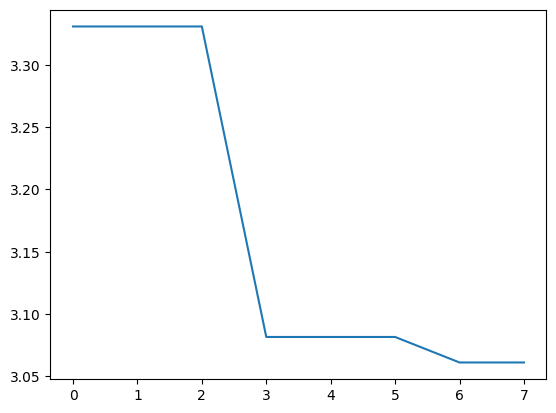

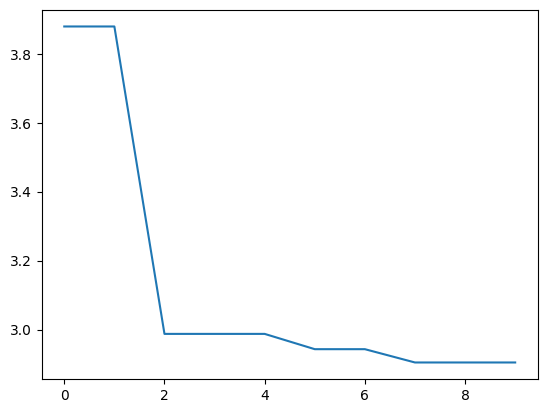

In [1353]:
experimentsOnGA6 = []
def experimentOnGA6(pop_size, crate, e_threshold,stagnation_limit,elitism_size):
    population_size = pop_size
    
    crossover_probability = crate
    
    fitness_sum = 0
    for i in range(2):
        fitness_sum += genetic_algorithm6(pop_size,  crate, e_threshold,stagnation_limit,elitism_size)
    avg_fitness = fitness_sum/2
    experimentsOnGA5.append([avg_fitness, [pop_size, crate, e_threshold,stagnation_limit,elitism_size]])

def runExperimentOnGA6():
    experimentOnGA6(10,0.75,0.01,5,3)
   
    
    
    
runExperimentOnGA6()
experimentsOnGA6

In [1336]:

""" 
-pop_size: population size
-cprob: crossover probablity
-e_threshold: epsilon value
-elitism_size: number of best chromosomes to preserve to the next generation

Termination stategy: Run till there the best fitness is lower than 2.905
Muation: Non unifiorm muation, based on the change of the fitness between generations
New population: Crossover and Elitism      
"""

def genetic_algorithm7(pop_size, crate, e_threshold,stagnation_limit, elitism_size):
    # Initialization
    mutation_prob = 0.02
    pop = gen_population(pop_size)
    numPairs = pop_size//2
    best_fitness = 100 
    stagnation_count = 0
    generation = 0
    fitnesses = []
    while(True):
        
        generation +=1
        parent_pairs = select_parents(pop, numPairs)
        current_best_chrom, elites, average_fitness = get_best(pop, elitism_size)
        current_best_fitness = evaluate(current_best_chrom)
        
        diversity_check = abs((best_fitness-current_best_fitness)/best_fitness)
        
        # Check for stagnation in the best fitness
        
        if diversity_check < e_threshold:
            stagnation_count += 1
        else:
            stagnation_count = 0
        
        if stagnation_count >= stagnation_limit:  
            mutation_prob *= 1.8   
        else:
            mutation_prob *= 0.2  
        new_population = []
        for i in parent_pairs:
            child1, child2 = crossover(np.array(i[0]),np.array(i[1]),crate)
            child1 = mutate(child1,mutation_prob)
            child2 = mutate(child2,mutation_prob)
            new_population.append(child1)
            new_population.append(child2)

        # Update population for the next generation
        pop = elites + new_population
            
        best_fitness = current_best_fitness
        
        
        print(best_fitness, current_best_chrom)
        print()
        fitnesses.append(best_fitness)
        if best_fitness < 2.905 :
            print(f"Terminating due to good fitness generations.")
            break
    print(f"Generation {generation}: Best Fitness = {best_fitness}, Best Candidate = {current_best_chrom}")
    x = np.arange(generation)
    y = fitnesses
    fig, ax = plt.subplots()
    ax.plot(x,y)
    plt.show
    return best_fitness
   
    


3.063847165418356 [0.5279302486233023, -1.0209493160529415, 0.9015083826941976]

3.063847165418356 [0.5279302486233023, -1.0209493160529415, 0.9015083826941976]

3.063847165418356 [0.5279302486233023, -1.0209493160529415, 0.9015083826941976]

3.063847165418356 [0.5279302486233023, -1.0209493160529415, 0.9015083826941976]

3.049760371716252 [0.5984391442338605, -1.0181861951746243, 0.8470097140857847]

3.049760371716252 [0.5984391442338605, -1.0181861951746243, 0.8470097140857847]

3.049443706004374 [0.538316044622475, -1.020537988523666, 0.8622343122562242]

2.9833798279958943 [0.42424450162343624, -0.8163098887486208, 0.4523602620391012]

2.9071452493264283 [0.5675167592111866, -0.6108730408605669, 0.7157038102056887]

2.9071452493264283 [0.5675167592111866, -0.6108730408605669, 0.7157038102056887]

2.9071452493264283 [0.5675167592111866, -0.6108730408605669, 0.7157038102056887]

2.8986927598001584 [0.5351757961923991, -0.6380175837612261, 0.6922324994435368]

Terminating due to good 

[]

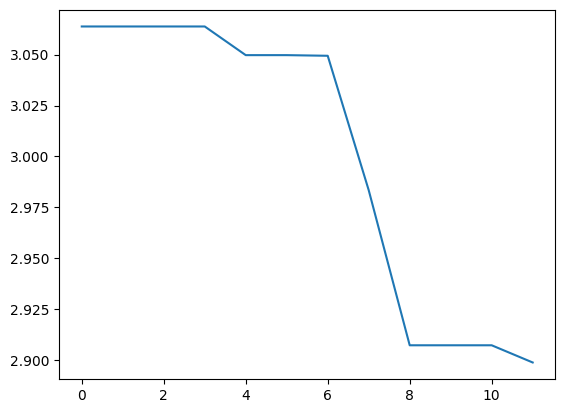

In [1337]:
experimentsOnGA7 = []
def experimentOnGA7(pop_size, crate, e_threshold,stagnation_limit,elitism_size):
    population_size = pop_size
    
    crossover_probability = crate
    
    fitness_sum = 0
    for i in range(1):
        fitness_sum += genetic_algorithm7(pop_size,  crate, e_threshold,stagnation_limit,elitism_size)
    avg_fitness = fitness_sum/1
    experimentsOnGA5.append([avg_fitness, [pop_size, crate, e_threshold,stagnation_limit,elitism_size]])

def runExperimentOnGA7():
    experimentOnGA7(10,0.75,0.01,1,3)
   
    
    
    

runExperimentOnGA7()
experimentsOnGA7

In [1399]:
%%writefile regression.py

import numpy as np
import matplotlib.pyplot as plt
import random
#ao ∈ [0, 2], a1 ∈ [−2, 0], and a2 ∈ [−1, 1].
def my_fun(x,y,a0,a1,a2):
    return (a0*np.cbrt(x-5)) + (a1*np.cbrt(y+5)) + a2

#computes the mean square error
def obj_function(pred, actVal):
    
    return np.square(np.subtract(pred, actVal)).mean() 

"""
-genrates population given a size
-chromosomes with 3 genes
-values for genes randomly sampled with the respective ranges
-ao ∈ [0, 2], a1 ∈ [−2, 0], and a2 ∈ [−1, 1]

"""
def gen_population(size):
    population = []
    for _ in range(size):
        population.append([random.uniform(0,2.0001), random.uniform(-2,0.0001), random.uniform(-1,1.0001)])
    
    #print("Generated population of size ", size)
    return population


"""
-evaluates the fitness of a chromosome
-gets predicted values f(x,y) for all (x,y) pairs in the traing data
-fitness is the error value measured by obj_fun()

"""

def evaluate(chromosome, dataset):
    predictions = [] 
    for i in range(len(tset)) :
        predictions.append(my_fun(dataset[i][0],dataset[i][1],chromosome[0], chromosome[1], chromosome[2]))
    fitness = obj_function(predictions, dataset[2])
    
    
    return fitness



def roulette_wheel_selection(population):
    
    fitness_values = [1/evaluate(chromosome) for chromosome in population]
    total_fitness = sum(fitness_values)
    
    # Calculate selection probabilities
    selection_probs = [fitness / total_fitness for fitness in fitness_values]
    
    # Perform roulette wheel spin
    cumulative_probability = [i for i in selection_probs]
    for i in range(1,len(population)):
        cumulative_probability[i] = cumulative_probability[i-1] + selection_probs[i]
    
    selected_index = -1
    spin = random.uniform(0, 1)


def select_parents(population,numPairs):
    parents = []
    #generate parent pairs array the half the size of the population
    for _ in range(numPairs):
        parents.append([roulette_wheel_selection(population),roulette_wheel_selection(population)])
    return parents

    

    for i, prob in enumerate(selection_probs):
        if spin <= cumulative_probability[i]:
            selected_index = i
            break

    return population[selected_index]
# Function to perform uniform crossover between two parents
def crossover(parent1, parent2, crossover_probability):
    
    # Create an empty child chromosome
    child1 = [0]*3
    child2 = [0]*3
    crossover = False
    # Uniformly select genes from parents to create the child chromosome
    for i in range(len(parent1)):
        if random.uniform(0,1) <= crossover_probability:
            
            r = random.uniform(0,1)
            
            child1[i] = (parent1[i] * r) + (parent2[i]*(1-r))
            child2[i] = (parent1[i] * (1-r)) + (parent2[i] * r)
            crossover = True
    if crossover:
        #print(f"Crossover beetween {parent1} and {parent2} Resulted in {child1} and {child2}")
        return child1, child2
    else:
        #print(f"No Crossover between {parent1} and {parent2}")
        return parent1, parent2
def mutate(chromosome,mutation_probability):
    mutated = False
    for i in range(len(chromosome)):
        if random.uniform(0,1) <= mutation_probability:
            #print(f"Performing mutation on chromosome {chromosome} at index {i}")
            mutated = True
            
            if i == 0:
                chromosome[i] = random.uniform(0, 2.0001)
            if i == 1:
                chromosome[i] = random.uniform(-2, 0.001)
            if i == 2:
                chromosome[i] = random.uniform(-1, 1.001)
            
            
    #if mutated:
        #print(f"Resulting chromosome: {chromosome}\n")
    #else:
        #print(f"No mutation for {chromosome}\n")
    
    return chromosome
   
def get_best(population,elitism_size):
    fitness_values = []
    elites = []
    for chromosome in population:
        fitness_values.append(evaluate(chromosome))
    average_fitness = sum(fitness_values) / len(population)   
    elite_indices = sorted(range(len(fitness_values)), key=lambda i: fitness_values[i])[:elitism_size]
    elites = [population[i] for i in elite_indices]
    
    return elites[0], elites, average_fitness

""" 
-pop_size: population size
-cprob: crossover probablity
-e_threshold: epsilon value
-elitism_size: number of best chromosomes to preserve to the next generation

Termination stategy: Run till there the best fitness is lower than 2.905
Muation: Non unifiorm muation, based on the change of the fitness between generations
New population: Crossover and Elitism      
"""

def genetic_algorithm_final(dataset):
    #properties of the Genetic Algorithm
    pop_size = 10
    cprob = 0.75
    e_threshold = 0.01
    stagnation_limit = 1
    elitism_size = 3

    # Initialization
    mutation_prob = 0.02
    pop = gen_population(pop_size)
    numPairs = pop_size//2
    best_fitness = 100 
    stagnation_count = 0
    generation = 0
    fitnesses = []
    while(True):
        
        generation +=1
        parent_pairs = select_parents(pop, numPairs)
        current_best_chrom, elites, average_fitness = get_best(pop, elitism_size)
        current_best_fitness = evaluate(current_best_chrom, dataset)
        
        diversity_check = abs((best_fitness-current_best_fitness)/best_fitness)
        
        # Check for stagnation in the best fitness
        
        if diversity_check < e_threshold:
            stagnation_count += 1
        else:
            stagnation_count = 0
        
        if stagnation_count >= stagnation_limit:  
            mutation_prob *= 1.8   
        else:
            mutation_prob *= 0.2  
        new_population = []
        for i in parent_pairs:
            child1, child2 = crossover(np.array(i[0]),np.array(i[1]),crate)
            child1 = mutate(child1,mutation_prob)
            child2 = mutate(child2,mutation_prob)
            new_population.append(child1)
            new_population.append(child2)

        # Update population for the next generation
        pop = elites + new_population
            
        best_fitness = current_best_fitness
      
        fitnesses.append(best_fitness)
        if best_fitness < 2.905 :
            print(f"Terminating on generation {generation} due to good fitness value of {best_fitness}. ")
            print(f"Best chromosome: {current_best_chrom}")
            break
    x = np.arange(generation)
    y = fitnesses
    fig, ax = plt.subplots()
    ax.plot(x,y)
    plt.show
    return current_best_chrom
   



Overwriting regression.py
